# Análisis de datos para la empresa Coursera

Desarrollado por: Nery Jiménez - 201700381
___

## Carga de datos provenientes de un archivo `*.csv` utilizando la herramienta `pandas`.


In [3]:
import pandas as pd
df = pd.read_csv('datos.csv')
df


,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36 reviews,NaN,[],"['Week 1 - Get Ready', 'Session 2 - Get Set', ...",['William J. White'],['Northwestern University'],Social Sciences,https://www.coursera.org/learn/power-onboarding
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,NaN,NaN,77 reviews,Creating engaging parent surveys using Google ...,"['Education', 'online tools', 'engagement', 'e...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/education-fe...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10 reviews,NaN,[],"['Week 1', 'WEEK 2']",['Pablo Palomino'],['Emory University'],Social Sciences,https://www.coursera.org/learn/makingprogress
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,NaN,11 reviews,Learn about choice boards and their use within...,"['Teaching tools', 'elementary teaching', 'eng...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/use-microsof...


# Realizando limpieza de datos
Los datos proporcionados incluyen campos vacíos e información con nomenclatura confusa. Por lo que se debe realizar una limpieza de datos acorde a las necesidades de los informes que se deben reportar.

En este caso, se procede a eliminar los campos que se encuentran vacíos y se reemplazan por un 0 (cero).

In [4]:
df.fillna(0,inplace=True)
df

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",0,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,0,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,0,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,0.0,Beginner level,Approx. 8 hours to complete,Flexible schedule,0,0,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36 reviews,0,[],"['Week 1 - Get Ready', 'Session 2 - Get Set', ...",['William J. White'],['Northwestern University'],Social Sciences,https://www.coursera.org/learn/power-onboarding
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,0,0,77 reviews,Creating engaging parent surveys using Google ...,"['Education', 'online tools', 'engagement', 'e...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/education-fe...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10 reviews,0,[],"['Week 1', 'WEEK 2']",['Pablo Palomino'],['Emory University'],Social Sciences,https://www.coursera.org/learn/makingprogress
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,0,11 reviews,Learn about choice boards and their use within...,"['Teaching tools', 'elementary teaching', 'eng...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/use-microsof...


# Calculando promedio
Se nos solicita realizar el cálculo del promedio de calificaciones para cada curso. Por lo que necesitaremos agrupar los datos por el título del curso y posteriormente calcular el promedio de calificaciones por cada curso.

Primero nos aseguramos de que los datos sean del tipo numérico, procedemos a agruparlos por el título y obtenemos los promedios.

In [6]:
# Convirtiendo 'Rating' a tipo numérico
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calculando el promedio para cada curso
promedio_calificaciones = df.groupby('Course Title')['Rating'].mean()

promedio_calificaciones

Course Title
 Assisting Public Sector Decision Makers With Policy Analysis                                                          4.8
 Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE    4.9
 Build a social media presence for your business using Canva                                                           4.7
 Build social awareness content for Twitter with Canva                                                                 0.0
 Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado                                                       4.9
                                                                                                                      ... 
현대 로봇공학, 강좌 2: 로봇 기구학                                                                                                  0.0
현대 로봇공학, 강좌 3: 로봇 동역학                                                                                                  0.0
현대 

# Calculando los cursos con mayor y menor rating

Ya que tenemos calculado el promedio de las calificaciones, utilizaremos este valor para encontrar el curso con mayor rating, aparte del valor del rating también necesitamos el id del curso, por lo que utilizaremos el método `idxmax()`.

Para el menor rating es el mismo proceso, pero con el método `idxmin()`

In [7]:
# Encontrar el curso con el mayor rating
curso_max_rating = promedio_calificaciones.idxmax()
max_rating = promedio_calificaciones.max()

# Encontrar el curso con el menor rating
curso_min_rating = promedio_calificaciones.idxmin()
min_rating = promedio_calificaciones.min()

# Mostrar los resultados
print(f"Curso con el mayor rating: {curso_max_rating} - {max_rating}")
print(f"Curso con el menor rating: {curso_min_rating} - {min_rating}")


Curso con el mayor rating:  التنسيق في مايكروسوفت إكسل | Formatting in MS Excel  - 5.0
Curso con el menor rating:  Build social awareness content for Twitter with Canva - 0.0


# Calculando el porcentaje de cursos con horario flexible.

Primero debemos filtrar todos los datos para ver cuántos cursos tienen horario flexible. Esto lo haremos con el método `df[df['filtro']`.
Ya que tenemos este dato, contamos cuántos cursos tienen el filtro que realizamos, y lo dividimos entre el total de registros para obtener el porcentaje deseado.


In [8]:
# Filtrar los cursos con horario flexible
cursos_flexible = df[df['Schedule'] == 'Flexible schedule']

# Calcular el porcentaje de cursos flexibles respecto al total de cursos
porcentaje_cursos_flexible = (len(cursos_flexible) / len(df)) * 100

# Redondear el porcentaje a dos decimales
porcentaje_cursos_flexible = round(porcentaje_cursos_flexible, 2)

# Mostrar el resultado
print(f"Porcentaje de cursos con horario flexible: {porcentaje_cursos_flexible}%")


Porcentaje de cursos con horario flexible: 92.88%


# GRÁFICOS SOLICITADOS

Se han solicitado una serie de gráficos para poder visualizar los reportes de una forma más eficaz. 

## Número de cursos en cada nivel de dificultad
Para este reporte mostraremos una gráfica de barras la cual generamos con el siguiente código:

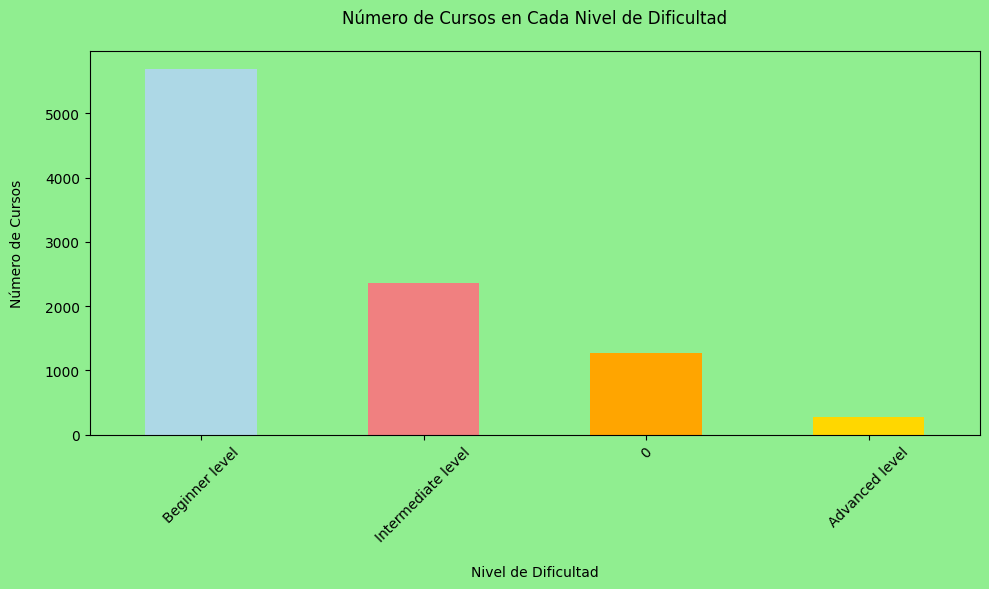

In [27]:
import matplotlib.pyplot as plt

# Contar el número de cursos en cada nivel de dificultad
nivel_dificultad_counts = df['Level'].value_counts()

# Definir una paleta de colores personalizada
colors = ['lightblue', 'lightcoral', 'orange', 'gold']

# Crear la gráfica de barras con un fondo blanco y la paleta de colores personalizada
plt.figure(figsize=(10, 6))
plt.rcParams.update({'axes.facecolor': 'lightgreen', 'figure.facecolor': 'lightgreen'})
nivel_dificultad_counts.plot(kind='bar', color=colors)
plt.title('Número de Cursos en Cada Nivel de Dificultad', pad=20)
plt.xlabel('Nivel de Dificultad', labelpad=15)
plt.ylabel('Número de Cursos', labelpad=15)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()




## Número de cursos en las principales categorías
Este reporte lo mostraremos con una gráfica de barras horizontal:

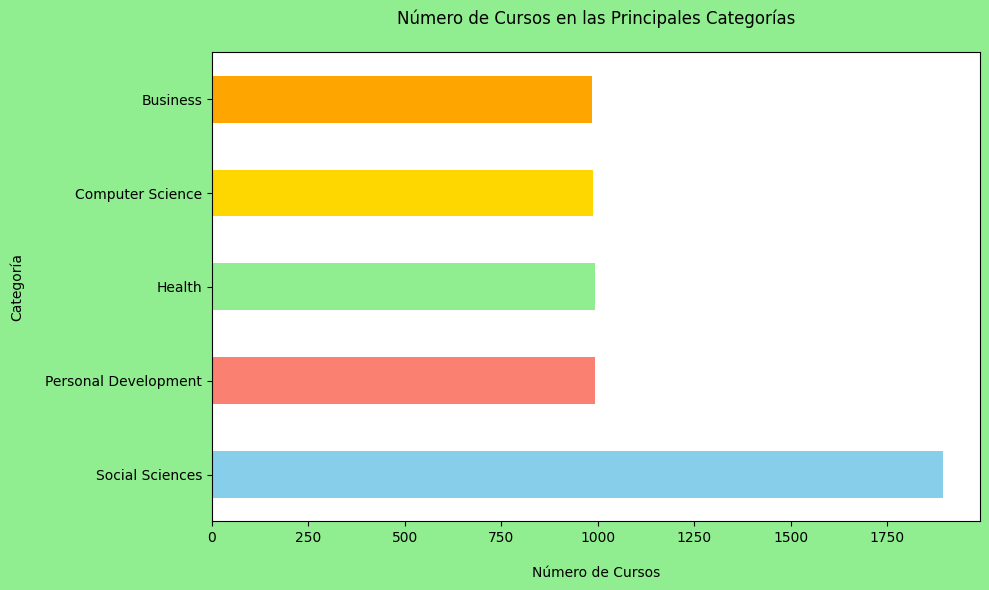

In [28]:
import matplotlib.pyplot as plt

# Contar el número de cursos en cada categoría
categorias_counts = df['Keyword'].value_counts().head(5)

# Definir una paleta de colores personalizada
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orange']

# Crear la gráfica de barras horizontal con la paleta de colores personalizada
plt.figure(figsize=(10, 6))
plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})
categorias_counts.plot(kind='barh', color=colors)
plt.title('Número de Cursos en las Principales Categorías', pad=20)
plt.xlabel('Número de Cursos', labelpad=15)
plt.ylabel('Categoría', labelpad=15)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


## Relación entre la duración del curso y el número de revisiones

Se nos presenta esta vez en forma de gráfico de dispersión.